In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# 한글 폰트를 사용할 수 있게 만들어줌
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = 'NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록
mpl.font_manager._rebuild()

In [34]:
match = pd.read_csv('WorldCupMatches.csv').dropna()
match

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


In [4]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  850 non-null    float64
 1   Datetime              850 non-null    object 
 2   Stage                 850 non-null    object 
 3   Stadium               850 non-null    object 
 4   City                  850 non-null    object 
 5   Home Team Name        850 non-null    object 
 6   Home Team Goals       850 non-null    float64
 7   Away Team Goals       850 non-null    float64
 8   Away Team Name        850 non-null    object 
 9   Win conditions        850 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  850 non-null    float64
 12  Half-time Away Goals  850 non-null    float64
 13  Referee               850 non-null    object 
 14  Assistant 1           850 non-null    object 
 15  Assistant 2           8

---

In [25]:
namesss = match[match['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()

In [26]:
namesss

rn">Republic of Ireland       5
rn">Bosnia and Herzegovina    1
rn">Serbia and Montenegro     1
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
Name: Home Team Name, dtype: int64

In [21]:
namesss.index

Index(['rn">Republic of Ireland', 'rn">Bosnia and Herzegovina',
       'rn">Serbia and Montenegro', 'rn">United Arab Emirates',
       'rn">Trinidad and Tobago'],
      dtype='object')

In [23]:
namesss.unique

<bound method Series.unique of rn">Republic of Ireland       5
rn">Bosnia and Herzegovina    1
rn">Serbia and Montenegro     1
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
Name: Home Team Name, dtype: int64>

In [24]:
namesss.unique()

array([5, 1], dtype=int64)

In [9]:
namess = match[match['Home Team Name'].str.contains('rn">')]['Home Team Name']
namess

414      rn">United Arab Emirates
433       rn">Republic of Ireland
446       rn">Republic of Ireland
452       rn">Republic of Ireland
492       rn">Republic of Ireland
582       rn">Republic of Ireland
647       rn">Trinidad and Tobago
649     rn">Serbia and Montenegro
813    rn">Bosnia and Herzegovina
Name: Home Team Name, dtype: object

In [14]:
namess.unique()

array(['rn">United Arab Emirates', 'rn">Republic of Ireland',
       'rn">Trinidad and Tobago', 'rn">Serbia and Montenegro',
       'rn">Bosnia and Herzegovina'], dtype=object)

In [18]:
namess.values

array(['rn">United Arab Emirates', 'rn">Republic of Ireland',
       'rn">Republic of Ireland', 'rn">Republic of Ireland',
       'rn">Republic of Ireland', 'rn">Republic of Ireland',
       'rn">Trinidad and Tobago', 'rn">Serbia and Montenegro',
       'rn">Bosnia and Herzegovina'], dtype=object)

---

#### 국가명 전처리 : preprocessing 함수

In [39]:
def preprocessing(data):
    # rn"> 을 포함하고 있는 Home Team Name의 수
    names = data[data['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
    wrong = list(names.index)
    # >를 구분으로 나누어 올바른 국가만 넣기
    correct = [name.split('>')[1] for name in wrong]
    old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
    new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium']
    wrong = wrong + old_name
    correct = correct + new_name
    for index, wr in enumerate(wrong):
        data = data.replace(wrong[index], correct[index])
    return data

In [41]:
match = preprocessing(match)
match.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


#### 역대 월드컵에서 각 국가별로 승리한 수를 출력, 파이차트

In [42]:
def winner(match):
    if match['Home Team Goals'] > match['Away Team Goals']:
        return match['Home Team Name']
    if match['Home Team Goals'] < match['Away Team Goals']:
        return match['Away Team Name']

In [43]:
match['outcome'] = match.apply(lambda x: winner(x), axis=1)

In [44]:
# match outcome에 있는 각 국가별 수를 세고, 상위 10개를 출력하세요.
f = match['outcome'].value_counts(ascending=False).head(10)
# f = match['outcome'].value_counts()[:10]
f

Brazil         71
Germany        68
Italy          45
Argentina      44
Spain          29
Netherlands    29
France         29
England        26
Uruguay        20
Sweden         16
Name: outcome, dtype: int64

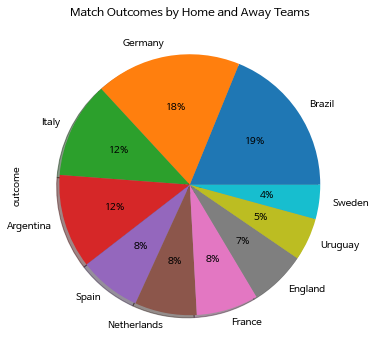

In [46]:
plt.figure(figsize = (6,6))
f.plot.pie(autopct= '%1.0f%%', shadow =True)
plt.title('Match Outcomes by Home and Away Teams')
plt.show()

#### 나라를 입력받으면 역대 월드컵 전적을 보여주는 함수

In [47]:
def worldcup_record(country):
    home_win  = len(match[(match['Home Team Name'] == country) & (match['Home Team Goals'] > match['Away Team Goals'])])
    away_win  = len(match[(match['Away Team Name'] == country) & (match['Home Team Goals'] < match['Away Team Goals'])])
    win = home_win + away_win

    home_defeat  = len(match[(match['Home Team Name'] == country) & (match['Home Team Goals'] < match['Away Team Goals'])])
    away_defeat  = len(match[(match['Away Team Name'] == country) & (match['Home Team Goals'] > match['Away Team Goals'])])
    defeat = home_defeat + away_defeat

    home_draw  = len(match[(match['Home Team Name'] == country) & (match['Home Team Goals'] == match['Away Team Goals'])])
    away_draw  = len(match[(match['Away Team Name'] == country) & (match['Home Team Goals'] == match['Away Team Goals'])])
    draw = home_draw + away_draw

    print(f'{country}의 역대 월드컵 전적은 {win} 승 {defeat} 패 {draw} 무 입니다.')

In [48]:
worldcup_record('England')

England의 역대 월드컵 전적은 26 승 16 패 20 무 입니다.


In [51]:
match[match['Home Team Name'].str.contains('Korea')]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,outcome
179,1966.0,15 Jul 1966 - 19:30,Group 4,Ayresome Park,Middlesbrough,Korea DPR,1.0,1.0,Chile,,...,0.0,1.0,KANDIL Aly Hussein (EGY),CRAWFORD William (SCO),FINNEY Jim (ENG),238.0,1609.0,PRK,CHI,None
187,1966.0,19 Jul 1966 - 19:30,Group 4,Ayresome Park,Middlesbrough,Korea DPR,1.0,0.0,Italy,,...,1.0,0.0,SCHWINTE Pierre (FRA),ADAIR John (NIR),TAYLOR John (ENG),238.0,1679.0,PRK,ITA,Korea DPR
374,1986.0,05 Jun 1986 - 16:00,Group A,Estadio Ol�mpico Universitario,Mexico City,Korea Republic,1.0,1.0,Bulgaria,,...,0.0,1.0,AL SHANAR Fallaj Khuzam (KSA),IGNA Ioan (ROU),BUTENKO Valeri (RUS),308.0,460.0,KOR,BUL,None
386,1986.0,10 Jun 1986 - 12:00,Group A,Cuauhtemoc,Puebla,Korea Republic,2.0,3.0,Italy,,...,0.0,1.0,SOCHA David (USA),URREA Joaquin (MEX),AL SHARIF Jamal (SYR),308.0,643.0,KOR,ITA,Italy
434,1990.0,17 Jun 1990 - 21:00,Group E,Dacia Arena,Udine,Korea Republic,1.0,3.0,Spain,,...,1.0,1.0,JACOME GUERRERO Elias V. (ECU),MAGNI Pierluigi (ITA),LOUSTAU Juan (ARG),322.0,175.0,KOR,ESP,Spain
444,1990.0,21 Jun 1990 - 17:00,Group E,Friuli,Udine,Korea Republic,0.0,1.0,Uruguay,,...,0.0,0.0,LANESE Tullio (ITA),DIRAMBA Jean Fidele (GAB),JOUINI Neji (TUN),322.0,290.0,KOR,URU,Uruguay
480,1994.0,23 Jun 1994 - 19:30,Group C,Foxboro Stadium,Boston,Korea Republic,0.0,0.0,Bolivia,,...,0.0,0.0,MOTTRAM Leslie (SCO),MATTHYS Luc (BEL),EVERSTIG Mikael (SWE),337.0,3065.0,KOR,BOL,None
524,1998.0,13 Jun 1998 - 17:30,Group E,Stade de Gerland,Lyon,Korea Republic,1.0,3.0,Mexico,,...,1.0,0.0,BENKO Gunter (AUT),FRED Lencie (VAN),SCHNEIDER Erich (GER),1014.0,8732.0,KOR,MEX,Mexico
593,2002.0,04 Jun 2002 - 20:30,Group D,Busan Asiad Main Stadium,Busan,Korea Republic,2.0,0.0,Poland,,...,1.0,0.0,RUIZ Oscar (COL),DORIRI Elise (VAN),LINDBERG Leif (SWE),43950100.0,43950014.0,KOR,POL,Korea Republic
609,2002.0,10 Jun 2002 - 15:30,Group D,Daegu World Cup Stadium,Daegu,Korea Republic,1.0,1.0,USA,,...,0.0,1.0,MEIER Urs (SUI),BEREUTER Egon (AUT),TOMUSANGE Ali (UGA),43950100.0,43950030.0,KOR,USA,None


In [52]:
worldcup_record('Korea Republic')

Korea Republic의 역대 월드컵 전적은 5 승 17 패 9 무 입니다.
